# INT15 FINAL PROJECT

## Due Date:  June 12, midnight

<span style="color:red">
    <h1> Predicting Restaurant Closure with Yelp Data </h1>
</span>

<span style="color:blue">
<h2> Names: Mingxi Chen </h2>
</span>

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import codecs
import requests
import yaml

%matplotlib inline

# First, load the original Yelp business detail dataset
The dataset is originally in json format. I will load the dataset that contains business details.

<span style="color:red">
    <h3> The codes I comment out below are run with original json data file that is too large to upload, so I output the result of this part and so I can upload and import it. </h3>
</span>

In [2]:
#The directory where the data is located
#path = "C:/Users/Andy Chan/desktop/INT15/project/data/yelp_dataset_1/"
#The filename of the data to be loaded
#filename = "business.json"

#Read the business information
#business = []
#with open(path+filename,encoding="utf-8") as json_file:
 #   for i in json_file:
  #      business.append(json.loads(i))

See what features are in the dataset.

In [3]:
#buss_features = business[0].keys()
#print(buss_features)

I only want the restaurant data.

In [4]:
#Only keep restaurant data
#restaurant = [i for i in business if "Restaurants" in i["categories"]]
#Define a dataframe with the json file
#business_df = pd.DataFrame(business)
#res_df = business_df[business_df["categories"].str.contains("Restaurant",na=False)]
#res_df.head()

Also, I am only interested the restaurants in Arizona.

In [5]:
#Filter out the restaurant that is not in Arizona
#az_res = res_df[res_df["state"]=="AZ"]
#See how many observations left
#len(az_res)

# Target Label Creation
**In this setion, I will derive the most recent status of the restaurants using Yelp API to see that if they become closed permanently or not. And label them with is_closed column, 1 saying a restaurant is get closed while 0 indicates still being open.**

In [6]:
#see the distribution of open restaurants
#sns.distplot(a=list(az_res["is_open"]))

**I am not interested in the restaurants that was already closed when the data was collected.**

In [7]:
#Keep the restaurants that are open
#df = az_res[az_res["is_open"]==1]
#len(df)

**Now I will derive the status using two different API key, since the daily limit for each key is 5000.**

In [8]:
#Define two API keys to be used
#APIKey1={"Client ID":"tNCX-W8WTULG5f1ADW_9BQ", \
#        "API Key":"f17NhWeGw3eZ2TvoJHH4cFMMYNvlvoI6okPSoRBxrMWZQwunMsAMtwF2ICpy-_Hd_o9K3tTCwmI_4G2brOD0710AEsNRDpTVQr2hj7ExNjO_JFlg_Ogy3jdpw0H9XHYx"}

#APIKey2={"Client ID":"x2S-T8-hiJkP_LZ1t4okQ", \
 #        "API Key":"1-JFV7Rj8XFjSIV0Qr7w6aJ-7G0N02nJirOTz0ldtD5ley7KQ1uvG_Ug5N3K7FB85blIvJ5aOTvtX4B8XmXjr-fG_qOYH8QNdQaW54p9opbExyKp1B1n3FHSdqQJW3Yx"}



In [9]:
#Since the request limiti of Yelp API is 5000 daily, I need to get the label with two calls
#df1 = df.iloc[:4000]
#df2 = df.iloc[4000:]

In [10]:
#Set up headers with my API key
#headers = {'Authorization': 'Bearer %s' % YelpApiKey.APIKey2['API Key']}

In [11]:
#Define a function that get a the new is_open column
def get_is_open(endpnt, business_id, headers):
    if business_id!="":
        req = requests.get(endpnt+business_id,headers=headers)
        json_data = json.loads(req.text)
        try:
            return (json_data["is_closed"])
        except:
            return("")
    else:
        return("")

In [12]:
#Define the API endpoint
#endpoint = "https://api.yelp.com/v3/businesses/"
#Derive is_closed label
#is_open_2 = [get_is_open(endpoint, i, headers) for i in df1.business_id]

In [13]:
#Set up headers with my API key
#headers = {'Authorization': 'Bearer %s' % YelpApiKey.APIKey1['API Key']}
#Derive is_closed label
#is_open_1 = [get_is_open(endpoint, i, headers) for i in df2.business_id]

In [14]:
#Merge two list
#is_closed = is_open_2 + is_open_1
#This column is the target label that indicates if a previous open restaurant becomes closed

#Add this column to the data frame
#is_closed = pd.Series(is_closed, index=df.index)
#df["is_closed"] = is_closed

#Check missing values
#df.is_closed.value_counts()

**We have a lot of missing values, and they are my target label. 
I think this is due to the unmatched business id, so I will use Yelp API to get the correct business id.**

In [15]:
#Get the index of the missing values
#missing_idx = [i for i in range(len(is_closed)) if is_closed.iloc[i]==""]

In [16]:
#Define a function to search the correct business id
def search_id(buss_detail, headers):
    '''Input: a pandas series that contain the business detials, including name, city, state
            headers = api token
        return: a valid business id or "" '''
    #Define the endpoint
    ep = "https://api.yelp.com/v3/businesses/matches"
    try: 
        #Define the parameters
        params = {'city':buss_detail["city"], \
                  'state':buss_detail["state"], \
                  "country":"US", \
                  "address1":buss_detail["address"], \
                  "name":buss_detail["name"]}
    except:
        return("")
    #Request data from Yelp API
    js = requests.get(ep, params=params, headers=headers)
    try:
        return(json.loads(js.text)["businesses"][0]["id"])
    except:
        return("")

In [17]:
#Set up headers with my API key
#headers = {'Authorization': 'Bearer %s' % YelpApiKey.APIKey1['API Key']}
#correct_id = [search_id(df.iloc[i],headers) for i in missing_idx]

In [18]:
#Use another API token
#headers = {'Authorization': 'Bearer %s' % YelpApiKey.APIKey2['API Key']}
#Derive is_closed label again
#is_closed_3 = [get_is_open(endpoint, i, headers) for i in correct_id]

In [19]:
#for i in range(len(missing_idx)):
 #   is_closed.iat[missing_idx[i]] = is_closed_3[i]
#Updata the is_closed column in the dataframe
#df["is_closed"] = is_closed
#df.is_closed.value_counts()

**There are still 32 missing values in the target is_closed label. I will output the labeled dataset the drive, and lebel these 32 restaurants manually by doing reserach on Yelp and Google.**

In [20]:
#Drop the is_open column since we know they are all true
#df = df.drop("is_open",axis=1)

In [21]:
#Output the processed dataset
#df.to_csv("Arizona_restaurants.csv",index=False)`

# Load the well-labeled dataset

In [22]:
#Download the csv file from my Google drive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1p3ZM7CbBAH1c-fBOoYm955kxy5XhcAYs' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1p3ZM7CbBAH1c-fBOoYm955kxy5XhcAYs" -O "Arizona_restaurants.csv" && rm -rf /tmp/cookies.txt

--2019-06-18 20:29:34--  https://docs.google.com/uc?export=download&confirm=&id=1p3ZM7CbBAH1c-fBOoYm955kxy5XhcAYs
Resolving docs.google.com (docs.google.com)... 74.125.142.102, 74.125.142.138, 74.125.142.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/20nrseg8tbm9fjjt4f3s3q4gf8pg78rt/1560888000000/18419957613213493679/*/1p3ZM7CbBAH1c-fBOoYm955kxy5XhcAYs?e=download [following]
--2019-06-18 20:29:34--  https://doc-0g-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/20nrseg8tbm9fjjt4f3s3q4gf8pg78rt/1560888000000/18419957613213493679/*/1p3ZM7CbBAH1c-fBOoYm955kxy5XhcAYs?e=download
Resolving doc-0g-6c-docs.googleusercontent.com (doc-0g-6c-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to doc-0g-6c-docs.googleusercontent.com (doc

In [23]:
#Import the well labeled dataset for further analysis
df = pd.read_csv("Arizona_restaurants.csv",encoding='unicode_escape')

**For the target label, convert False to 0, True to be 1**

In [24]:
def label_to_int(label):
    '''Input: a stirng of label, "True","False","0",or "1"
        return: an integer, 0 or 1'''
    if label=="TRUE" or label=="1":
        return(1)
    else:
        return(0)

In [25]:
#Use the function defined to update the column
target_label = pd.Series([label_to_int(i) for i in df.is_closed], index=df.index)
df["is_closed"] = target_label

## Drop observation of food trucks
There are some missing values in the address column. They are mostly due to the observation are food trucks, instead of restaurants. Since I want to focus on the restaurant, I drop the obs of food trucks.


In [26]:
df = df[~df["categories"].str.contains("Food Trucks",na=False)]
len(df)

7528

In [27]:
df.head()

,address,attributes,business_id,categories,city,hours,latitude,longitude,name,postal_code,review_count,stars,state,is_closed
0,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",33.495194,-112.028588,Taco Bell,85016.0,18,3.0,AZ,0
1,"13843 N Tatum Blvd, Ste 15","{'Caters': 'True', 'GoodForKids': 'True', 'Noi...",44YFU284Z3KDEy25QyVoUw,"Chinese, Restaurants",Phoenix,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",33.613020,-111.977036,Nee House Chinese Restaurant,85032.0,269,3.5,AZ,0
2,1789 W Jefferson,"{'RestaurantsDelivery': 'False', 'BusinessAcce...",ysfeDcLAYk_MVzfBmyiSTg,"Restaurants, Food, Cafes",Phoenix,0,33.446805,-112.097129,Vals Getaway DES Cafeteria,85007.0,14,3.0,AZ,0
3,550 N Hayden Rd,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",nsNONDHbV7Vudqh21uicqw,"Seafood, Restaurants",Scottsdale,"{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",33.454286,-111.909405,Salt Cellar,85257.0,526,3.5,AZ,0
4,"3415 West Glendale Ave, Bldg 25A","{'RestaurantsGoodForGroups': 'True', 'Business...",Rs8Wi4OEjeOX7LVlzsXDOA,"Restaurants, Mexican, Sushi Bars",Phoenix,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",33.537164,-112.132926,Sushi Mocorito,85051.0,9,3.0,AZ,0


# EDA

## Summary and missing values

In [28]:
#See the summary of the numeric variables
df.describe()

,latitude,longitude,postal_code,review_count,stars,is_closed
count,7528.000000,7528.000000,7522.000000,7528.000000,7528.000000,7528.000000
mean,33.487370,-112.007638,85188.402154,128.709883,3.427338,0.034936
std,0.121348,0.173916,127.252821,192.302628,0.846240,0.183631
min,33.210781,-112.540321,84295.000000,3.000000,1.000000,0.000000
25%,33.394531,-112.121741,85034.000000,20.000000,3.000000,0.000000
50%,33.479590,-111.983147,85226.000000,61.000000,3.500000,0.000000
75%,33.582570,-111.891655,85283.000000,159.000000,4.000000,0.000000
max,33.844608,-111.600936,85734.000000,2556.000000,5.000000,1.000000


In [29]:
#Look at missing values
df.count()

address         7492
attributes      7334
business_id     7528
categories      7528
city            7528
hours           7528
latitude        7528
longitude       7528
name            7528
postal_code     7522
review_count    7528
stars           7528
state           7528
is_closed       7528
dtype: int64

**There are missing values, but not a lot. I will deal with them further.**

## Distribution of review count

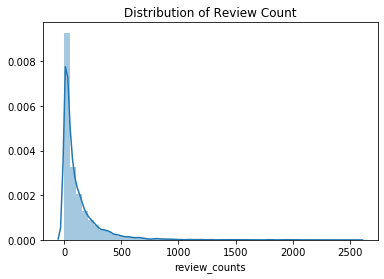

In [30]:
sns.distplot(a=list(df.review_count))
plt.xlabel("review_counts")
plt.title("Distribution of Review Count");

## Distribution of stars

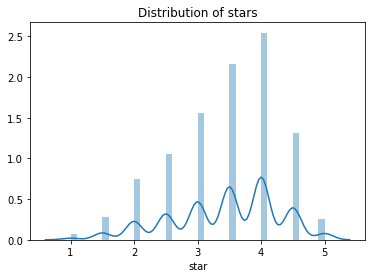

In [31]:
sns.distplot(a=df.stars)
plt.xlabel("star")
plt.title("Distribution of stars");

## Distribution by city

In [32]:
len(df.city.unique())

51

In [33]:
df["city"].value_counts()

Phoenix                 2650
Scottsdale               921
Mesa                     812
Tempe                    646
Chandler                 542
Glendale                 492
Gilbert                  391
Peoria                   255
Surprise                 167
Goodyear                 143
Avondale                 139
Cave Creek                59
Fountain Hills            51
Sun City                  36
Litchfield Park           33
Tolleson                  28
Laveen                    27
El Mirage                 18
Paradise Valley           13
Sun City West             12
Carefree                  11
Buckeye                   10
Queen Creek                9
Sun Lakes                  9
Youngtown                  5
PHOENIX                    4
Anthem                     4
Fort McDowell              4
Ahwatukee                  4
Guadalupe                  4
Laveen Village             4
Apache Junction            3
Higley                     3
Fort Mcdowell              2
Central       

I can see that, for instance, Mesa is represented by "Mesa", "mesa", "Mesa AZ", and "MESA". So if I want to convert this column to dummies variables, I need to deal with this kind of duplicates to reduce the dimension. 

## Distribution of the target variable is_closed


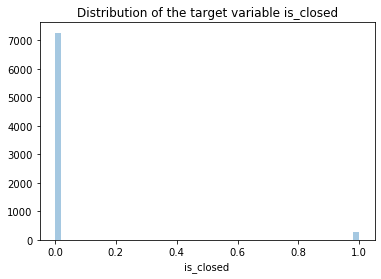

In [34]:
sns.distplot(a=list(df.is_closed),kde=False)
plt.xlabel("is_closed")
plt.title("Distribution of the target variable is_closed");

In [35]:
df["is_closed"].value_counts()

0    7265
1     263
Name: is_closed, dtype: int64

Class imbalance is several.

# Feature engineering 

### Create dummy variables with city column


In [36]:
#First lowercase the city name
city = df.city.str.lower()
len(city.unique())

44

In [37]:
city.unique()

array(['phoenix', 'scottsdale', 'chandler', 'mesa', 'glendale',
       'surprise', 'goodyear', 'gilbert', 'sun city', 'avondale',
       'cave creek', 'tempe', 'peoria', 'fountain hills', 'sun lakes',
       'fort mcdowell', 'laveen', 'paradise valley', 'tolleson',
       'somerton', 'carefree', 'litchfield park', 'queen creek',
       'el mirage', 'anthem', 'glendale az', 'apache junction', 'buckeye',
       'guadalupe', 'sun city west', 'youngtown', 'mesa az',
       'laveen village', 'scottdale', 'ahwatukee', 'higley', 'phx',
       'waddell', 'maricopa', 'central city', 'central city village',
       'rio verde', 'phoenix valley', 'central'], dtype=object)

In [38]:
#Deal with the rest of duplicates
city = [i if i!='mesa az' else "mesa" for i in city]
city = [i if i!='central' else "central city" for i in city]
city = [i if i!="phx" else "phoenix" for i in city]
city = [i if i!="scottdale" else "scottsdale" for i in city]
city = [i if i!="glendale az" else "glendale" for i in city]
city = pd.Series(city, index=df.index)
len(city.unique())

39

In [39]:
#Create dummies 
city = pd.get_dummies(city)
df = pd.concat([df,city],axis=1)

In [40]:
df.head()

,address,attributes,business_id,categories,city,hours,latitude,longitude,name,postal_code,...,scottsdale,somerton,sun city,sun city west,sun lakes,surprise,tempe,tolleson,waddell,youngtown
0,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",33.495194,-112.028588,Taco Bell,85016.0,...,0,0,0,0,0,0,0,0,0,0
1,"13843 N Tatum Blvd, Ste 15","{'Caters': 'True', 'GoodForKids': 'True', 'Noi...",44YFU284Z3KDEy25QyVoUw,"Chinese, Restaurants",Phoenix,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",33.613020,-111.977036,Nee House Chinese Restaurant,85032.0,...,0,0,0,0,0,0,0,0,0,0
2,1789 W Jefferson,"{'RestaurantsDelivery': 'False', 'BusinessAcce...",ysfeDcLAYk_MVzfBmyiSTg,"Restaurants, Food, Cafes",Phoenix,0,33.446805,-112.097129,Vals Getaway DES Cafeteria,85007.0,...,0,0,0,0,0,0,0,0,0,0
3,550 N Hayden Rd,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",nsNONDHbV7Vudqh21uicqw,"Seafood, Restaurants",Scottsdale,"{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",33.454286,-111.909405,Salt Cellar,85257.0,...,1,0,0,0,0,0,0,0,0,0
4,"3415 West Glendale Ave, Bldg 25A","{'RestaurantsGoodForGroups': 'True', 'Business...",Rs8Wi4OEjeOX7LVlzsXDOA,"Restaurants, Mexican, Sushi Bars",Phoenix,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",33.537164,-112.132926,Sushi Mocorito,85051.0,...,0,0,0,0,0,0,0,0,0,0


### Create a new indicator column that indicates if a restaurant is one of the chain restaurant


In [41]:
#Create a dictonary where keys are restaurant names, values are occurance of the name in the data frame
chain_dict = df.name.value_counts().to_dict()
#Store the restaurant names
res_names = list(chain_dict.keys())
#Make a dictionary where keys are names, values are chain restaurant indicatior, 0 or 1
chain_dict = [1 if chain_dict[i]>1 else 0 for i in res_names]
chain_dict = pd.Series(chain_dict, index=res_names).to_dict()

In [42]:
#Based on the dictonary above, create an indicotr column
is_chain = [chain_dict[i] for i in df.name]
is_chain = pd.Series(is_chain, index=df.index)
df["is_chain"] = is_chain

In [43]:
df.is_chain.value_counts()

1    3772
0    3756
Name: is_chain, dtype: int64

### Derive price range from attributes

In [44]:
def get_price(string):
    try:
        return(yaml.load(string)['RestaurantsPriceRange2'])
    except:
        #Impute unknown if the price range is missing
        return("None")

In [45]:
price = pd.Series([get_price(i) for i in df.attributes], index=df.index)
#See the distribution of price range
price.value_counts()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


1       3792
2       2952
None     602
3        152
4         30
dtype: int64

In [46]:
#Create dummy variables
price_dummy = pd.get_dummies(price,prefix="price")
df = pd.concat([df,price_dummy],axis=1)

# Review Text Processing

<span style="color:red">
    <h3> Again I started with the original review json file, but it was too larget to upload, so I filter out those review that don't belong to the restaurants of interest. I comment out the fitlering part.  </h3>
</span>

In [47]:
#The directory where the data is located
#path = "C:/Users/Andy Chan/desktop/INT15/project/data/yelp_dataset_1/"
#The filename of the data to be loaded
#filename = "review.json"

#Read the review daat
#review = []
#with open(path+filename,encoding="utf-8") as json_file:
 #   for i in json_file:
  #      review.append(json.loads(i))
#Convert it to a data frame
#review_df = pd.DataFrame(review)
#review_df.head()

**This is the review dataset for all review, including the businesses I excluded, so I will filter them by business_id.**

In [48]:
#Get the business ids
#biz_id = df.business_id

**Filter out the reviews with their business_ids.**

In [49]:
#Get the index of the review that matches the ids
#matched_idx = [i for i in range(len(review_df)) if (review_df.loc[i,"business_id"] in list(biz_id))]
#Use the index to filter
#review_df = review_df.loc[matched_idx]

In [50]:
#See how many reviews matched
#len(review_df)

In [51]:
#Drop "cool","funny","useful","user_id"
#review_df = review_df.drop(columns=["funny","cool","useful","user_id"])
#Ouput a filterred reivew dataset
#review_df.to_csv("filtered_review.csv",index=False)

# Load the filtered review, and start the pre-processing

In [52]:
#Download the review data set from my Google drive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Ap8uefa0HCHM25TC2AJNiznyUxPxFm51' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Ap8uefa0HCHM25TC2AJNiznyUxPxFm51" -O "filtered_review.csv" && rm -rf /tmp/cookies.txt

--2019-06-18 20:29:56--  https://docs.google.com/uc?export=download&confirm=EMax&id=1Ap8uefa0HCHM25TC2AJNiznyUxPxFm51
Resolving docs.google.com (docs.google.com)... 74.125.142.100, 74.125.142.102, 74.125.142.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mjl0sbsthg0go9ine239of2i30n44t4i/1560888000000/18419957613213493679/*/1Ap8uefa0HCHM25TC2AJNiznyUxPxFm51?e=download [following]
--2019-06-18 20:29:56--  https://doc-08-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mjl0sbsthg0go9ine239of2i30n44t4i/1560888000000/18419957613213493679/*/1Ap8uefa0HCHM25TC2AJNiznyUxPxFm51?e=download
Resolving doc-08-6c-docs.googleusercontent.com (doc-08-6c-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to doc-08-6c-docs.googleusercontent.com 

<span style="color:red">
    <h3> Since the Kernel will ALWAYS die if I use all reivew data, so I decide to set a maximum of 10 for each restaurants.   </h3>
</span>

In [53]:
#Read the dataframe
review_df = pd.read_csv("filtered_review.csv")
#Group the review by business_id
grouped_review = review_df[["business_id","text"]].groupby('business_id')  
#Create a list of data frame of each group
groups = [grouped_review.get_group(i) for i in grouped_review.groups]

In [54]:
def cap(dataframe):
    '''a function that cap the number of observation of a dataframe to 10 by doing sampling
    Input: a dataframe
    return: a dataframe has 10 or less obs'''
    if len(dataframe)>10:
        return(dataframe.sample(n=10, random_state=314))
    else:
        return(dataframe)

In [55]:
#Again make them back to one single dataframe
capped = [cap(i) for i in groups]
capped_review = pd.concat(capped,axis=0)
len(capped_review)

70402

In [56]:
#Get the number of reviews for each business
num_review = [len(i) for i in capped]

In [57]:
#Merge all reviews by their business id
review_df = capped_review.groupby("business_id")["text"].apply(" ".join)
review_df = review_df.reset_index(level=0)

In [58]:
len(review_df)

7406

## Text Cleaning


In [59]:
text = review_df["text"]

### Lowercase

In [60]:
text = text.str.lower()

### Expand Contractions

In [61]:
#Define a list of contraction
contractions=["n't","'ll","'ve","'re", "'d","'s"]
#Define a list of expaned contraction
expanded=[" not"," will"," have"," are"," would",""]

for i in range(len(expanded)):
    text = text.str.replace(contractions[i],expanded[i])

### Remove numbers

In [62]:
text = text.str.replace(r"[0-9]","")

### Remove special characters and punctuation

In [63]:
#Remove punctuation
text = text.str.replace(r'[^\s\w]', " ")

### Strip extra white space

In [64]:
text= text.str.replace(r"[ ]{2,}", " ") \
                .str.strip()

## Remove stopwords

In [65]:
import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
#Tokenization
tokens = text.apply(lambda r:word_tokenize(r))

In [67]:
#Remove stopwords
tokens = tokens.apply(lambda r:[token for token in r if token not in stopwords])

## Perform lemmatization 

In [68]:
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [69]:
def pos_tag_text(text):
    '''Annotate text tokens with POS tags
    Input: A string 
    Output: A list of tokens that are tagged'''
    
    def penn_to_wn_tags(pos_tag):
        if pos_tag.startswith('J'):
            return wn.ADJ
        elif pos_tag.startswith('V'):
            return wn.VERB
        elif pos_tag.startswith('N'):
            return wn.NOUN
        elif pos_tag.startswith('R'):
            return wn.ADV
        else:
            return None

    tagged_text = pos_tag(text)
    tagged_lower_text = [(word.lower(), penn_to_wn_tags(pos_tag)) for word, pos_tag in tagged_text]
    
    return tagged_lower_text


def lemmatize_text(tokens):
    '''A function that lemmatize the input string
    Input: A string
    Output: A lemmatized string'''
    
    wnl = WordNetLemmatizer()
    pos_tagged_text = pos_tag_text(tokens)
    
    lemmatized_tokens = [wnl.lemmatize(word, pos_tag) if pos_tag else word for word, pos_tag in pos_tagged_text]
    lemmatized_text = ' '.join(lemmatized_tokens)
    
    return lemmatized_text

In [70]:
lemmatized_text = tokens.apply(lambda r:lemmatize_text(r))

## Sentimental Analysis using VADER

In [71]:
#Download the VADER dictionary from my Google drive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1UAc8ePRqG4JkLdgL7zEaSXjiFEWf1iaN' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1UAc8ePRqG4JkLdgL7zEaSXjiFEWf1iaN" -O "vader_lexicon.txt" && rm -rf /tmp/cookies.txt

--2019-06-18 20:34:37--  https://docs.google.com/uc?export=download&confirm=&id=1UAc8ePRqG4JkLdgL7zEaSXjiFEWf1iaN
Resolving docs.google.com (docs.google.com)... 74.125.142.102, 74.125.142.139, 74.125.142.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s48v8j3sk3u44mnf1ge9bevbma972dls/1560888000000/18419957613213493679/*/1UAc8ePRqG4JkLdgL7zEaSXjiFEWf1iaN?e=download [following]
--2019-06-18 20:34:37--  https://doc-0o-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s48v8j3sk3u44mnf1ge9bevbma972dls/1560888000000/18419957613213493679/*/1UAc8ePRqG4JkLdgL7zEaSXjiFEWf1iaN?e=download
Resolving doc-0o-6c-docs.googleusercontent.com (doc-0o-6c-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to doc-0o-6c-docs.googleusercontent.com (doc

In [72]:
open("vader_lexicon.txt")

<_io.TextIOWrapper name='vader_lexicon.txt' mode='r' encoding='UTF-8'>

In [73]:
#Read the txt file, set index, and set column names
sent_all = pd.read_csv("vader_lexicon.txt",sep="\t",index_col=0, names=["polarity","std","ratings"])
#Select only the polarity column
sent = sent_all[["polarity"]]
sent.head()

,polarity
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


In [74]:
tidy_format = lemmatized_text.str.split(r"[ ]+",expand=True).stack().reset_index(-1)
#Reset column names
tidy_format.columns = ["num","word"]

In [75]:
#1. Merge "tidy_format" and "sent" by words to get polarity
#2. drop columns excepct for polarity
#3. sum up the polarity by tweet id
polarity_df = tidy_format.merge(right=sent, left_on="word",right_index=True) \
                .drop(["num","word"],axis=1) \
                .groupby(level=0).apply(np.sum)

In [76]:
#Get the average for each business _id
avg_polarity = [float(polarity_df.iloc[i]/num_review[i]) for i in range(len(polarity_df))]

In [77]:
review_df["avg_polarity"] = pd.Series(avg_polarity,index=review_df.index)
review_df.head()

,business_id,text,avg_polarity
0,-01XupAWZEXbdNbxNg5mEg,If I weren't held hostage at hockey lessons tw...,10.27
1,-092wE7j5HZOogMLAh40zA,I normally like to write up a storm. But I'm g...,10.96
2,-0Sgh0QlUKVsWosCWJzGqQ,Update: I know it's really late but only fair ...,1.22
3,-0WegMt6Cy966qlDKhu6jA,Ordered my food an hour before the game. Got i...,3.19
4,-0tgMGl7D9B10YjSN2ujLA,If you would like to have your rights violated...,4.48


Text(0.5, 1.0, 'Distribution of Average Polartiy')

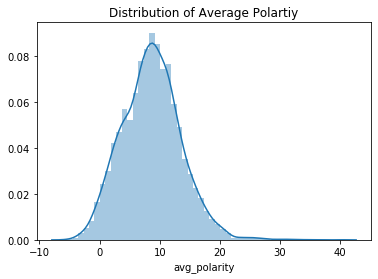

In [78]:
#See the distribution of overall avg_polarity
sns.distplot(a=list(review_df.avg_polarity))
plt.xlabel("avg_polarity")
plt.title("Distribution of Average Polartiy")

## Merge "polarity" to the master dataset by business_id

In [79]:
df2 = df.merge(left_on="business_id", right=review_df.set_index("business_id")["avg_polarity"], \
            right_index=True,how="left")
df2["avg_polarity"] = df2["avg_polarity"].fillna(0.0)

In [80]:
df1 = df2.drop(["address","attributes","business_id","categories","city","hours", \
               "latitude","longitude","name","postal_code","state"],axis=1)

# Normalize numerica variable

In [81]:
from sklearn import preprocessing

In [82]:
num_cols = ['review_count', 'stars','avg_polarity']
label_col = ["is_closed"]
dummies = ['ahwatukee', 'anthem', 'apache junction', 'avondale', 'buckeye', 'carefree', \
           'cave creek', 'central city', 'central city village', 'chandler', \
           'el mirage', 'fort mcdowell', 'fountain hills', 'gilbert', 'glendale', \
           'goodyear', 'guadalupe', 'higley', 'laveen', 'laveen village', \
           'litchfield park', 'maricopa', 'mesa', 'paradise valley', 'peoria', \
           'phoenix', 'phoenix valley', 'queen creek', 'rio verde', 'scottsdale', \
           'somerton', 'sun city', 'sun city west', 'sun lakes', 'surprise', \
           'tempe', 'tolleson', 'waddell', 'youngtown', 'price_1', 'price_2', \
           'price_3', 'price_4', 'price_None', 'is_chain']
#Normalize the numeric columns
num_df = pd.DataFrame(preprocessing.normalize(df1[num_cols]),columns=num_cols,index=df1.index)
dummy_df = df1[dummies]
label_df = df1[label_col]
#Concat and reorder columns
df1 = pd.concat([num_df,dummy_df,label_df],axis=1)

In [83]:
df1.shape

(7528, 49)

# Split training set and test set

In [84]:
from sklearn import model_selection

In [85]:
train_df, test_df = model_selection.train_test_split(df1, train_size=0.8, test_size=0.2, random_state=314)

In [86]:
[len(train_df),len(test_df)]

[6022, 1506]

In [87]:
X_tr = train_df.drop("is_closed",axis=1)
Y_tr = train_df.is_closed

X_tst = test_df.drop("is_closed",axis=1)
Y_tst = test_df.is_closed

### Use undersample to deal with class imbalance

In [88]:
def undersample( data, label):
    '''Perform random undersampling
    #Input: a data frame to be balanced,
            a list of label related to the data
    #Output: a balanced data frame, a balanced list of label'''
    #Count the number of closure
    closed_count = len(label[label==1])
    
    #Find the index of the open restaurant
    open_index = label[label==0].index
    
    #Random choose open restaurant so that their size is equal the size of closed restaurant
    random_index = np.random.choice(open_index,closed_count,replace=False)
    
    #Get index of closed restaurant
    closed_index = label[label==1].index
    
    #Get the index of resulting dataset
    undersampling = np.concatenate([closed_index,random_index])
    
    return data.loc[undersampling],label[undersampling]


In [89]:
X_tr, Y_tr = undersample(X_tr, Y_tr)

# Modeling and tuning

## Logistic regression with ridge only

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

ridge = LogisticRegression(penalty="l2", class_weight="balanced", tol=0.001, max_iter=100)

In [91]:
#Define a parameters grip for cross validation
para_grid = {"C": [0.01,0.1,0.5,1,5,10,100], \
            "solver":[ 'liblinear', 'saga']}

In [92]:
#4-fold cross validation
ridge_cv = GridSearchCV(ridge, para_grid, cv=4)
ridge_cv.fit(X_tr, Y_tr)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 0.5, 1, 5, 10, 100],
                         'solver': ['liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [93]:
#Def a fucntiont to find the best model and its mean test accuracy
def find_best(cv_out):
    return (cv_out.cv_results_["params"][np.where(cv_out.cv_results_['rank_test_score']==1)[0][0]], \
           cv_out.cv_results_['mean_test_score'][np.where(cv_out.cv_results_['rank_test_score']==1)[0][0]],)

In [94]:
#Get the best model
find_best(ridge_cv)

({'C': 0.5, 'solver': 'saga'}, 0.5911111111111111)

## Logistic with Lasso

In [95]:
lasso = LogisticRegression(penalty="l1", class_weight="balanced", tol=0.001, max_iter=100)

In [96]:
#Define a parameters grip for cross validation
para_grid = {"C": [0.01,0.1,0.5,1,5,10,100], \
            "solver":['liblinear', 'saga']}

In [97]:
#4-fold cross validation
lasso_cv = GridSearchCV(lasso, para_grid, cv=4)
lasso_cv.fit(X_tr, Y_tr)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='warn',
                                          tol=0.001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 0.5, 1, 5, 10, 100],
                         'solver': ['liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [98]:
find_best(lasso_cv)

({'C': 0.5, 'solver': 'saga'}, 0.6044444444444445)

## Logistic with ElasticNet

In [99]:
#!pip install -U scikit-learn

<span style="color:red">
    <h3> If error pops out, try updating sklearn with this line and then restart the notebook. Thanks :)   </h3>
</span>

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
elasticnet = LogisticRegression(penalty='elasticnet', class_weight="balanced", tol=0.001, max_iter=100, solver="saga")

In [102]:
#Define a parameters grip for cross validation
para_grid = {"C": [0.01,0.1,0.5,1,5,10,100], \
            "l1_ratio":[0.2, 0.4, 0.6, 0.8]}

In [103]:
#4-fold cross validation
elasticnet_cv = GridSearchCV(elasticnet, para_grid, cv=4)
elasticnet_cv.fit(X_tr, Y_tr)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='elasticnet',
                                          random_state=None, solver='saga',
                                          tol=0.001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 0.5, 1, 5, 10, 100],
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [104]:
find_best(elasticnet_cv)

({'C': 0.1, 'l1_ratio': 0.6}, 0.5977777777777777)

## Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier( class_weight="balanced")

In [106]:
#Define a parameters grip for cross validation
para_grid = {"max_depth": [5,8,10,15,30], \
             "n_estimators":[20,30], \
            "min_samples_split":[2,8,20]}

In [107]:
rf_cv = GridSearchCV(rf, para_grid, cv=4)
rf_cv.fit(X_tr, Y_tr)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [108]:
find_best(rf_cv)

({'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 30},
 0.5933333333333334)

# Prediction against test set

In [109]:
#Get the best logistic model
best_lr = LogisticRegression(penalty="l2", class_weight="balanced", tol=0.001, max_iter=100, \
                            C=0.1, solver ="saga")
best_lr.fit(X_tr, Y_tr)

#Get the best random forest 
best_rf = RandomForestClassifier( class_weight="balanced", max_depth=30, min_samples_split=2, n_estimators=30)
best_rf.fit(X_tr, Y_tr)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=30, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [110]:
#Make prediction 
lr_pred = best_lr.predict(X_tst)
lr_prob = best_lr.predict_proba(X_tst)

rf_pred = best_rf.predict(X_tst)
rf_prob = best_rf.predict_proba(X_tst)


# Look at Metrics: Recall, Precision, AUC

### Recall, Precision

In [111]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [112]:
lr_recall = recall_score(Y_tst, lr_pred)
lr_precision = precision_score(Y_tst, lr_pred)

rf_recall = recall_score(Y_tst, rf_pred)
rf_precision = precision_score(Y_tst, rf_pred)

In [113]:
[lr_recall, \
lr_precision, \
rf_recall, \
rf_precision]

[0.7105263157894737,
 0.039589442815249266,
 0.39473684210526316,
 0.023923444976076555]

### AUROC

In [114]:
def auc(preds, Y_ts):
    from sklearn import metrics
    #Get the predicted probability
    probs = preds[:,1]
    #Get fpr, tpr
    fpr,tpr, threshold=metrics.roc_curve(Y_ts,probs)
    #Get AUC
    auc_score=metrics.auc(fpr,tpr)
    #Plot the cur curve
    plt.plot(fpr, tpr,"b")
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel("tpr")
    plt.xlabel("fpr")
    plt.plot([0,1],[0,1],"--")
    plt.show()
    return(auc_score)

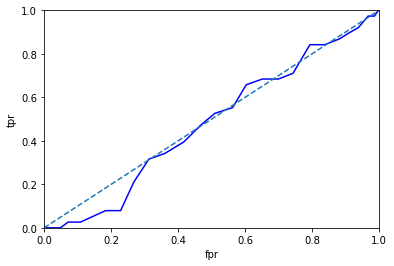

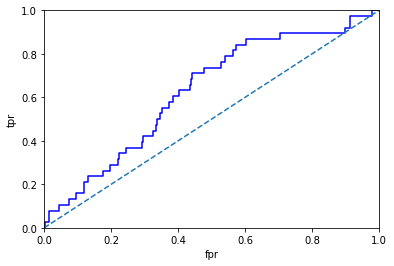

In [115]:
rf_auc = auc(rf_prob, Y_tst)
lr_auc = auc(lr_prob, Y_tst)

In [116]:
rf_auc

0.4787214972034992

In [117]:
lr_auc

0.6283701419761939

# Feature importance

In [118]:
pd.Series(best_rf.feature_importances_, index=X_tst.columns).sort_values( ascending=False).head(10)

avg_polarity    0.260848
stars           0.247794
review_count    0.243750
is_chain        0.043491
phoenix         0.021438
price_2         0.020840
chandler        0.018602
mesa            0.016596
price_1         0.016294
scottsdale      0.016147
dtype: float64

# Coefficients

In [119]:
pd.Series(best_lr.coef_[0], index=X_tst.columns).sort_values( ascending=False).head(5)

avg_polarity    0.562611
price_2         0.217367
phoenix         0.142052
mesa            0.109331
scottsdale      0.103593
dtype: float64

In [120]:
pd.Series(best_lr.coef_[0], index=X_tst.columns).sort_values( ascending=False).tail(5)

price_None     -0.113399
goodyear       -0.132753
peoria         -0.170246
review_count   -0.183087
is_chain       -0.518937
dtype: float64

## Submission

You are required to submit two files:

1. Submit your completed writeup as a PDF to gradescope.  You should address all of the components described above, adhering to the page limit, and include any figures and tables that are necessary. (Make sure to number figures and tables and include informative captions.)

2.  Submit a complete jupyter notebook with all of your analyses to the okpy server.  For your submission, use **this jupyter notebook** as a template (remove the instructions, replacing them with your analysis).  We should be able to reproduce all of your results by running your notebook. 

Before you submit the notebook, make sure that you select from the top menu `Kernel -> Restart & Clear Output` followed by `Cell -> Run All`. Verify that all computations execute correctly. There should be no errors when we run your notebook. 

In [121]:
# These lines help load your submission for grading.
from client.api.notebook import Notebook
ok = Notebook('final-project.ok')
_ = ok.auth(inline=True)

Assignment: final-project
OK, version v1.14.15



ERROR  | auth.py:102 | {'error': 'invalid_grant'}



Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: hXzmQEVEo9wMMUXC5F61KzffVM0aHm
Successfully logged in as mchen00@ucsb.edu


In [122]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'int15-final-project.ipynb'.
Submit... 100% complete
Backup... 100% complete
Submission successful for user: mchen00@ucsb.edu
URL: https://okpy.org/ucsb/int15/sp19/final_project/submissions/p8lGq6

